# Proyecto inf-280

Por José Llanos y Ariel Pulgar

## imports

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import statistics as st
print("listo")

listo


## Cargar DataFrame

In [107]:
df = pd.read_csv('rpa/VALPO.csv',sep=";",low_memory=False)
df_18 = pd.read_csv('rpa/VALPO_2018.csv',sep=";",low_memory=False)

In [109]:
df.shape
df_18.shape

(207407, 36)

In [110]:
df_18.describe()


,AGNO,RBD,DGV_RBD,COD_REG_RBD,COD_PRO_RBD,COD_COM_RBD,COD_DEPROV_RBD,COD_DEPE,COD_DEPE2,RURAL_RBD,...,COD_DES_CUR,MRUN,GEN_ALU,FEC_NAC_ALU,COD_REG_ALU,COD_COM_ALU,COD_RAMA,COD_SEC,COD_ESPE,ASISTENCIA
count,207407.0,207407.000000,207407.000000,207407.0,207407.000000,207407.000000,207407.000000,207407.000000,207407.000000,207407.000000,...,207407.000000,2.074070e+05,207407.000000,207407.000000,207407.000000,207407.000000,207407.000000,207407.000000,207407.000000,207407.000000
mean,2018.0,1607.497929,4.460737,5.0,53.868625,5390.075248,52.530175,2.421871,1.627886,0.047535,...,0.069337,1.275347e+07,1.489853,200543.946053,5.326353,5698.887386,29.966202,31.260372,3126.555353,83.422300
std,0.0,272.401538,2.745952,0.0,2.760800,274.969349,0.900659,0.983426,0.738135,0.212780,...,0.300171,7.379219e+06,0.499898,459.066109,1.664186,1648.984532,123.130242,128.378481,12839.910977,27.395822
min,2018.0,1119.000000,0.000000,5.0,51.000000,5101.000000,51.000000,1.000000,1.000000,0.000000,...,0.000000,1.650000e+02,1.000000,190001.000000,1.000000,1101.000000,0.000000,0.000000,0.000000,0.000000
25%,2018.0,1391.000000,2.000000,5.0,51.000000,5109.000000,52.000000,2.000000,1.000000,0.000000,...,0.000000,6.354070e+06,1.000000,200211.000000,5.000000,5109.000000,0.000000,0.000000,0.000000,86.000000
50%,2018.0,1590.000000,4.000000,5.0,53.000000,5304.000000,53.000000,2.000000,1.000000,0.000000,...,0.000000,1.274353e+07,1.000000,200602.000000,5.000000,5401.000000,0.000000,0.000000,0.000000,93.000000
75%,2018.0,1844.000000,7.000000,5.0,57.000000,5701.000000,53.000000,3.000000,2.000000,0.000000,...,0.000000,1.913188e+07,2.000000,200904.000000,5.000000,5701.000000,0.000000,0.000000,0.000000,97.000000
max,2018.0,2101.000000,9.000000,5.0,58.000000,5804.000000,54.000000,5.000000,4.000000,1.000000,...,3.000000,2.576885e+07,2.000000,201802.000000,16.000000,16304.000000,800.000000,810.000000,81005.000000,100.000000


## Contar NaN

In [111]:
Dataframe = pd.DataFrame
def contar_na(df: Dataframe) -> int:
    return df.isna().sum().sum()

In [112]:
print(contar_na(df))
print(contar_na(df_18))

0
0


## Discriminar entre columnas

In [130]:
# Seleccionamos las filas donde son solo municipales

# municipales COD_DEPE2 == 1
df_municipales = df.loc[df['COD_DEPE2']==1]
df_municipales_18 = df_18.loc[df_18['COD_DEPE2']==1]
print("Municipales 2021:",df_municipales.shape)
print("Municipales 2018:",df_municipales_18.shape)

# particular subvencionado COD_DEPE2 == 2
df_ps = df.loc[df['COD_DEPE2']==2]
df_ps_18 = df_18.loc[df_18['COD_DEPE2']==2]
print("Particulares subvencionados 2021:",df_ps.shape)
print("Particulares subvencionados 2018:",df_ps_18.shape)

# particular pagado COD_DEPE2 == 3
df_pp = df.loc[df['COD_DEPE2']==3]
df_pp_18 = df_18.loc[df_18['COD_DEPE2']==3]
print("Particulares pagados 2021:",df_pp.shape)
print("Particulares pagados 2018:",df_pp_18.shape)

Municipales 2021: (84163, 37)
Municipales 2018: (104171, 36)
Particulares subvencionados 2021: (82308, 37)
Particulares subvencionados 2018: (81524, 36)
Particulares pagados 2021: (16019, 37)
Particulares pagados 2018: (16432, 36)


## Funciones de utilidad

In [138]:
def removekey(d, key):
        r = dict(d)
        del r[key]
        return r
    
def frecuencias_notas(df: Dataframe):
    
    lista = df["PROM_GRAL"].tolist()
    frecuencias = {}
    for nota in lista:
        if nota not in frecuencias:
            frecuencias[nota]=1
        else:
            frecuencias[nota]+=1
    x = []
    y = []
    
    frecuencias = removekey(frecuencias,'0')
    for llave in frecuencias:
        x.append(float(llave.replace(",",".")))
        y.append(frecuencias[llave])
    
    dc = {'Nota': x, 'Frecuencia':y} 
    dfr = pd.DataFrame(dc)
    return dfr

## Frecuencia de notas

In [190]:
#Frecuencias notas municipales
dfm = frecuencias_notas(df_municipales).sort_values(by="Nota")
dfm_18 = frecuencias_notas(df_municipales_18).sort_values(by="Nota")

#Frecuencias notas particulares pagados
dfpp = frecuencias_notas(df_pp).sort_values(by="Nota")
dfpp_18 = frecuencias_notas(df_pp_18).sort_values(by="Nota")

#Frecuencias notas particulares subvencionados
dfps =frecuencias_notas(df_ps).sort_values(by="Nota")
dfps_18 =frecuencias_notas(df_ps_18).sort_values(by="Nota")

## Mediana de notas

In [214]:
def mediana_notas(df: Dataframe):
    notas=list()
    for nota in df['Nota'].tolist():
        i=df.loc[df['Nota']==nota]['Frecuencia'].tolist()[0]
        while i>0:
            notas.append(nota)
            i-=1
    return st.median(notas)

## Gráficos de notas

Text(6.3, 1, '6.3')

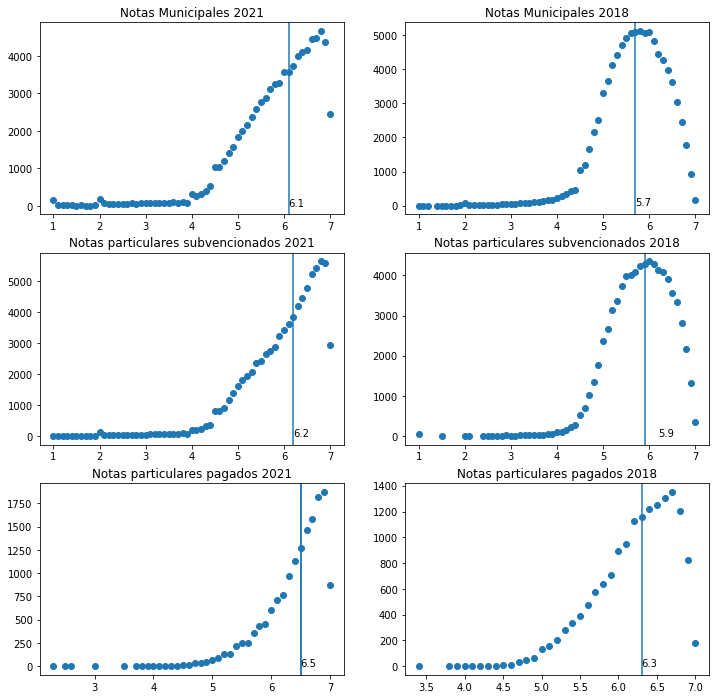

In [240]:
fig, axs = plt.subplots(3,2,figsize=(12,12))

#municipales
axs[0,0].scatter(x=dfm['Nota'],y=dfm['Frecuencia'])
axs[0, 0].set_title('Notas Municipales 2021')

med_dfm = mediana_notas(dfm)
axs[0,0].axvline(med_dfm)
axs[0,0].text(med_dfm,1,med_dfm)


axs[0,1].scatter(x=dfm_18['Nota'],y=dfm_18['Frecuencia'])
axs[0, 1].set_title('Notas Municipales 2018')

med_dfm_18 = mediana_notas(dfm_18)
axs[0,1].axvline(med_dfm_18)
axs[0,1].text(med_dfm_18,1,med_dfm_18)


#particulares subvencionados
axs[1,0].scatter(x=dfps['Nota'],y=dfps['Frecuencia'])
axs[1, 0].set_title('Notas particulares subvencionados 2021')

med_dfps = mediana_notas(dfps)
axs[1,0].axvline(med_dfps)
axs[1,0].text(med_dfps,1,med_dfps)


axs[1,1].scatter(x=dfps_18['Nota'],y=dfps_18['Frecuencia'])
axs[1, 1].set_title('Notas particulares subvencionados 2018')

med_dfps_18 = mediana_notas(dfps_18)
axs[1,1].axvline(med_dfps_18)
axs[1,1].text(med_dfps,1,med_dfps_18)


#particulares pagados
axs[2,0].scatter(x=dfpp['Nota'],y=dfpp['Frecuencia'])
axs[2, 0].set_title('Notas particulares pagados 2021')
axs[2,0].axvline(mediana_notas(dfpp))

med_dfpp = mediana_notas(dfpp)
axs[2,0].axvline(med_dfpp)
axs[2,0].text(med_dfpp,1,med_dfpp)


axs[2,1].scatter(x=dfpp_18['Nota'],y=dfpp_18['Frecuencia'])
axs[2, 1].set_title('Notas particulares pagados 2018')

med_dfpp_18 = mediana_notas(dfpp_18)
axs[2,1].axvline(med_dfpp_18)
axs[2,1].text(med_dfpp_18,1,med_dfpp_18)

## Análisis por frecuencia relativa

<AxesSubplot:title={'center':'Frecuencia relativa municipales 2018'}, xlabel='Nota', ylabel='Frecuencia'>

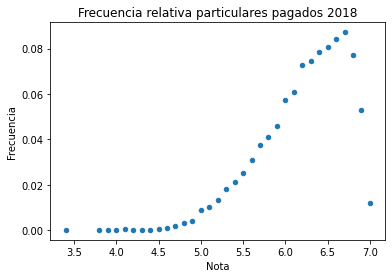

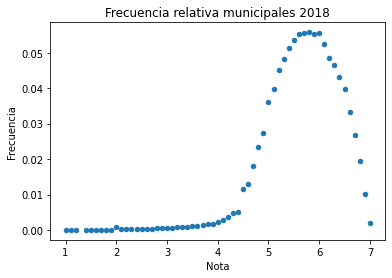

In [223]:
def notas_freq_relativa(df: Dataframe):
    y = df['Nota'].tolist()
    suma = sum(df['Frecuencia'])
    x = list()
    
    for item in df['Frecuencia'].tolist():
        x.append(item/suma)
    dic = {'Nota': y, 'Frecuencia': x}
    return pd.DataFrame(dic)

dfppr_18 = notas_freq_relativa(dfpp_18)
dfmr_18 = notas_freq_relativa(dfm_18)



dfppr_18.plot.scatter(x='Nota',y='Frecuencia', title='Frecuencia relativa particulares pagados 2018')
dfmr_18.plot.scatter(x='Nota',y='Frecuencia', title="Frecuencia relativa municipales 2018")

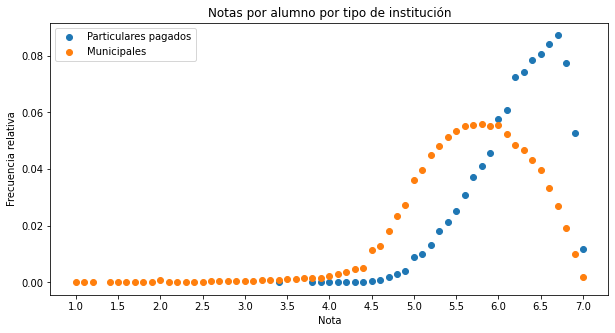

In [239]:
f = plt.figure(figsize = (10,5))
plt.scatter(x=dfppr_18['Nota'],y=dfppr_18['Frecuencia'],label='Particulares pagados')
plt.scatter(x=dfmr_18['Nota'],y=dfmr_18['Frecuencia'],label='Municipales')

plt.legend(loc="upper left")
plt.xlabel("Nota")
plt.ylabel("Frecuencia relativa")
plt.title("Notas por alumno por tipo de institución")
plt.xticks(np.arange(1, 7.5, 0.5))




plt.show()

# Datos SIMCE

In [11]:
dfsimce = pd.read_csv('simce/simce2m2018_rbd_publica_final_valpo.csv',sep=';')

In [5]:
dfsimce.head()

,agno,grado,rbd,dvrbd,nom_rbd,cod_reg_rbd,nom_reg_rbd,cod_pro_rbd,nom_pro_rbd,cod_com_rbd,...,marcadif_nat2m_rbd,palu_eda_ins_lect2m_rbd,palu_eda_ele_lect2m_rbd,palu_eda_ade_lect2m_rbd,palu_eda_ins_mate2m_rbd,palu_eda_ele_mate2m_rbd,palu_eda_ade_mate2m_rbd,noaplica,fecha_bbdd,codigo_bbdd
0,2018,2m,1,9,LICEO POLITECNICO ARICA,15,Región de Arica y Parinacota,151,ARICA,15101,...,3.0,"86,5","11,5","1,9","92,3","7,7",0,0,20190628,final20190628v1
1,2018,2m,4,3,LICEO OCTAVIO PALMA PEREZ,15,Región de Arica y Parinacota,151,ARICA,15101,...,NaN,"31,9","35,6","32,4",25,"47,8","27,2",0,20190628,final20190628v1
2,2018,2m,5,1,JOVINA NARANJO FERNANDEZ,15,Región de Arica y Parinacota,151,ARICA,15101,...,NaN,"33,6","43,2","23,2","27,2","58,4","14,4",0,20190628,final20190628v1
3,2018,2m,7,8,L. POLI. ANTONIO VARAS DE LA BARRA,15,Región de Arica y Parinacota,151,ARICA,15101,...,NaN,"78,4","16,3","5,3","76,3","22,1","1,7",0,20190628,final20190628v1
4,2018,2m,8,6,COLEGIO INTEGRADO EDUARDO FREI MONTALVA,15,Región de Arica y Parinacota,151,ARICA,15101,...,NaN,"65,6",25,"9,4","75,8","22,6","1,6",0,20190628,final20190628v1


In [12]:
dfsimce.shape

(383, 48)

## Discriminar entre columnas

In [14]:
# cod_depe2 : 1 --> municipal
#             2 --> particular subvencionado
#             3 --> particular pagado

df_simce_muni = dfsimce.loc[dfsimce['cod_depe2']==1]

df_simce_ps = dfsimce.loc[dfsimce['cod_depe2']==2]

df_simce_pp = dfsimce.loc[dfsimce['cod_depe2']==3]


In [18]:
Dataframe = pd.DataFrame
def simce_a_frecuencias(df: Dataframe, prueba: str):
    dic = {}
    lista = df[prueba].tolist()
    for nota in lista:
        if np.isnan(nota):
            pass
        elif nota not in dic:
            dic[nota]=1
        else:
            dic[nota]+=1
    x = []
    y = []
    
    for llave in dic:
        x.append(llave)
        y.append(dic[llave])
    dc = {'Puntaje': x, 'Frecuencia':y} 
    dfr = pd.DataFrame(dc)
    return dfr



In [23]:
var = simce_a_frecuencias(df_simce_ps,"prom_lect2m_rbd")

var1 = simce_a_frecuencias(df_simce_pp,"prom_lect2m_rbd")

var2 = simce_a_frecuencias(df_simce_muni,"prom_lect2m_rbd")

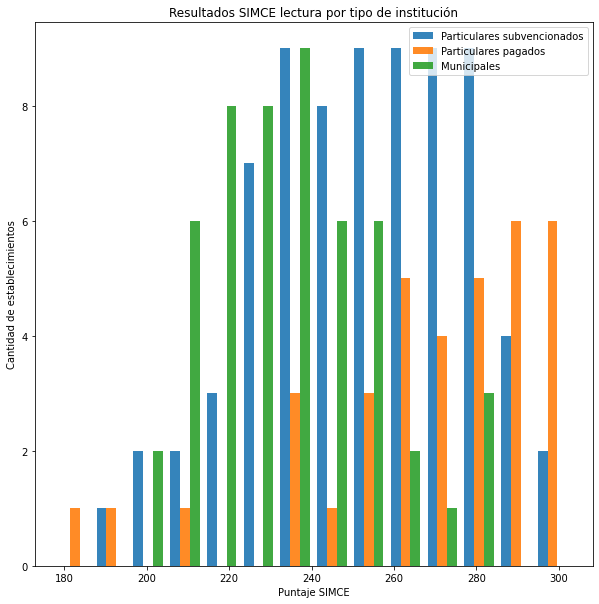

In [25]:
# Calculando puntaje mínimo y máximo
puntajes = list()
for puntaje in var["Puntaje"]:
    puntajes.append(puntaje)
for puntaje in var1["Puntaje"]:
    puntajes.append(puntaje)
for puntaje in var2["Puntaje"]:
    puntajes.append(puntaje)
minimo = min(puntajes)    
maximo = max(puntajes)


bins = np.linspace(minimo,maximo, 15)
plt.figure(figsize=(10,10))
plt.hist([var["Puntaje"],var1["Puntaje"],var2["Puntaje"]],bins = bins,alpha=0.9,label=['Particulares subvencionados', 'Particulares pagados','Municipales'])
plt.legend(loc='upper right')
plt.title("Resultados SIMCE lectura por tipo de institución")
plt.xlabel("Puntaje SIMCE")
plt.ylabel("Cantidad de establecimientos")
#plt.hist(,rwidth=0.9,alpha=0.5,bins = bins)
plt.show()

In [356]:
# Frecuencias

lenguaje_ps = simce_a_frecuencias(df_simce_ps,"prom_lect2m_rbd")

lenguaje_pp = simce_a_frecuencias(df_simce_pp,"prom_lect2m_rbd")

lenguaje_muni = simce_a_frecuencias(df_simce_muni,"prom_lect2m_rbd")

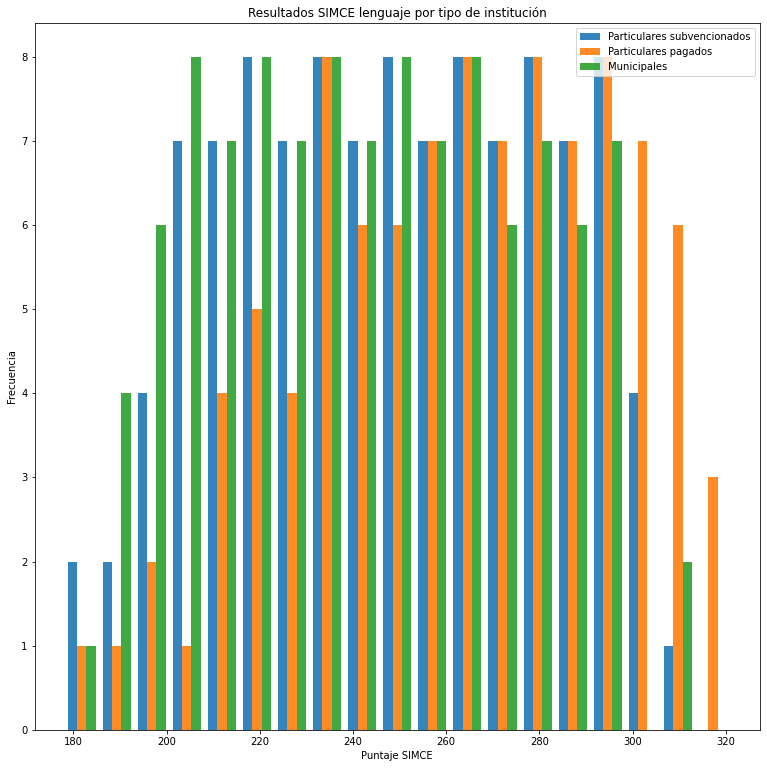

In [357]:
puntajes = list()
for puntaje in lenguaje_ps["Puntaje"]:
    puntajes.append(puntaje)
for puntaje in lenguaje_pp["Puntaje"]:
    puntajes.append(puntaje)
for puntaje in lenguaje_muni["Puntaje"]:
    puntajes.append(puntaje)
minimo = min(puntajes)    
maximo = max(puntajes)


bins = np.linspace(minimo,maximo, 20)
plt.figure(figsize=(13,13))
plt.hist([lenguaje_ps["Puntaje"],lenguaje_pp["Puntaje"],lenguaje_muni["Puntaje"]],bins = bins,alpha=0.9,label=['Particulares subvencionados', 'Particulares pagados','Municipales'])
plt.legend(loc='upper right')
plt.title("Resultados SIMCE lenguaje por tipo de institución")
plt.xlabel("Puntaje SIMCE")
plt.ylabel("Frecuencia")
plt.show()